<a href="https://colab.research.google.com/github/ParthDave111/financial-engineering-/blob/main/Analyzing_price_Stocks_and_crypto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import yfinance as yfin
from IPython.display import VimeoVideo

DATA PULL

In [25]:
# start = datetime.date.today() - datetime.timedelta(days=5*365)
# end = datetime.date.today()
start = datetime.date(2016, 11, 16)
end = datetime.date(2021, 11, 19)
df = yfin.download(["AMZN", "F", "BTC-USD"], start, end)["Adj Close"]
df["AMZN"] = 20 * df["AMZN"]  # code adapted for recent AMZN stock split

[*********************100%%**********************]  3 of 3 completed


In [3]:
df.head(10)

Ticker,AMZN,BTC-USD,F
Date,,,
2016-11-16,746.490021,744.197998,8.300294
2016-11-17,756.399994,740.976990,8.210372
2016-11-18,760.159988,751.585022,8.134286
2016-11-19,NaN,751.616028,NaN
2016-11-20,NaN,731.026001,NaN
2016-11-21,780.000000,739.247986,8.155037
2016-11-22,785.329971,751.346985,8.224208
2016-11-23,780.120010,744.593994,8.231123
2016-11-24,NaN,740.289001,NaN


In [4]:
df.describe()

Ticker,AMZN,BTC-USD,F
count,1261.000000,1829.000000,1261.000000
mean,2022.526539,14288.494413,8.184624
std,875.081737,16166.619474,2.029911
min,740.339966,731.026001,3.404901
25%,1427.050018,4610.479980,7.180170
50%,1812.969971,8269.809570,7.935140
75%,3078.099976,11790.916992,8.813594
max,3731.409912,67566.828125,17.109413


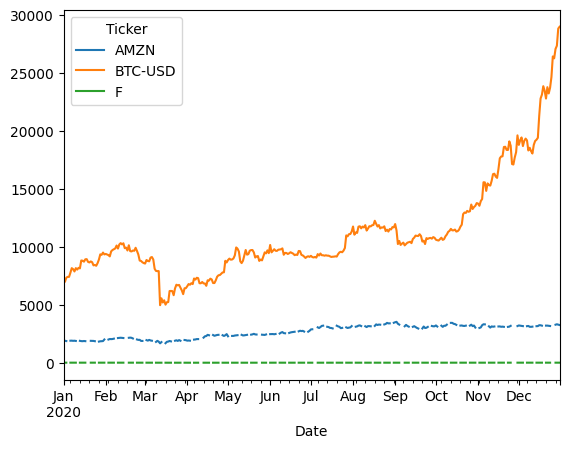

In [6]:
df["2020-01-01":"2020-12-31"].plot();

DATA PLOTTING

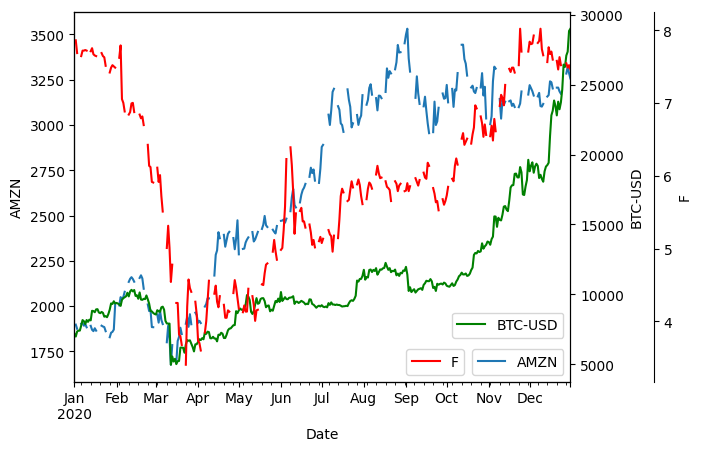

In [26]:
# Create the figure. We want a plot where the three assets have the same index (x-axis) but different scale (y-axis)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2020-01-01":"2020-12-31"].plot(ax=ax1, y="AMZN", legend=True)
df["2020-01-01":"2020-12-31"].plot(ax=ax2, y="BTC-USD", legend=True, color="g")
df["2020-01-01":"2020-12-31"].plot(ax=ax3, y="F", legend=True, color="r")

# We set the labels to the axes
ax1.set_ylabel("AMZN")
ax2.set_ylabel("BTC-USD")
ax3.set_ylabel("F")
ax3.spines["right"].set_position(("outward", 60))

# Set position of legends
ax1.legend(["AMZN"], loc="lower right")
ax2.legend(["BTC-USD"], loc="lower right", bbox_to_anchor=(1, 0.1))
ax3.legend(["F"], loc="lower right", bbox_to_anchor=(0.8, 0))

plt.show()

In [27]:
import pandas as pd  # Assuming pandas library is imported

# ... (Create or load your DataFrame `df` here)

# Handle missing values
df.dropna(inplace=True)

# Create new columns with logarithmic returns
df['Amazon'] = np.log(df['AMZN']) - np.log(df['AMZN'].shift(1))
df['Ford'] = np.log(df['F']) - np.log(df['F'].shift(1))
df['Bitcoin'] = np.log(df['BTC-USD']) - np.log(df['BTC-USD'].shift(1))

# Display the first few rows (optional)
# df.head()

In [19]:
df.head()


Ticker,AMZN,BTC-USD,F,Amazon,Ford,Bitcoin
Date,,,,,,
2016-11-18,760.159988,751.585022,8.134286,NaN,NaN,NaN
2016-11-21,780.000000,739.247986,8.155037,0.025765,0.002548,-0.016551


In [28]:
df = df.iloc[1:,3:]

In [29]:
df.head()

Ticker,Amazon,Ford,Bitcoin
Date,,,
2016-11-17,0.013188,-0.010893,-0.004338
2016-11-18,0.004959,-0.009310,0.014215
2016-11-21,0.025765,0.002548,-0.016551
2016-11-22,0.006810,0.008446,0.016234
2016-11-23,-0.006656,0.000840,-0.009028


In [30]:
np.round(df.tail(3), 3)

Ticker,Amazon,Ford,Bitcoin
Date,,,
2021-11-16,-0.001,-0.004,-0.055
2021-11-17,0.002,0.009,0.003
2021-11-18,0.041,-0.015,-0.058


In [31]:
print("AMZN = ", 1.282 * 3696.06)
print("F = ", 119.403 * 17.14)
print("Bitcoin = ", 1.353 * 56942.14)

AMZN =  4738.34892
F =  2046.56742
Bitcoin =  77042.71542


In [32]:
df = df.join(yfin.download(["BLV"], start, end)["Adj Close"])
df.rename(columns={"Adj Close": "BLV"}, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [33]:
df.tail()


,Amazon,Ford,Bitcoin,BLV
Date,,,,
2021-11-12,0.015048,-0.002561,-0.012300,94.340370
2021-11-15,0.005807,0.018293,-0.009366,93.183090
2021-11-16,-0.001405,-0.003531,-0.054922,92.937073
2021-11-17,0.002341,0.008553,0.003431,93.565819
2021-11-18,0.040601,-0.015221,-0.058424,93.875626


In [34]:
df

,Amazon,Ford,Bitcoin,BLV
Date,,,,
2016-11-17,0.013188,-0.010893,-0.004338,66.195114
2016-11-18,0.004959,-0.009310,0.014215,65.832626
2016-11-21,0.025765,0.002548,-0.016551,66.010155
2016-11-22,0.006810,0.008446,0.016234,66.039749
2016-11-23,-0.006656,0.000840,-0.009028,65.803009
...,...,...,...,...
2021-11-12,0.015048,-0.002561,-0.012300,94.340370
2021-11-15,0.005807,0.018293,-0.009366,93.183090
2021-11-16,-0.001405,-0.003531,-0.054922,92.937073


In [37]:
# In order to calculate the returns of the stocks, we need to drop the NA rows.
returns_stocks_BLV = df[["Amazon", "Ford", "BLV"]].dropna().pct_change()

# Crypto is traded 24/7
returns_BTC = df[["Bitcoin"]].pct_change()

# We broadcast the index of crypto on the stocks in order to join the datasets having NaN for weekends within stocks and BLV columns
returns_stocks = returns_stocks_BLV.reindex(returns_BTC.index)

returns = returns_BTC.join(returns_stocks_BLV, how="outer")[1:]

returns

,Bitcoin,Amazon,Ford,BLV
Date,,,,
2016-11-18,-4.277139,-0.624009,-0.145274,-0.005476
2016-11-21,-2.164346,4.196029,-1.273655,0.002697
2016-11-22,-1.980861,-0.735686,2.315097,0.000448
2016-11-23,-1.556142,-1.977409,-0.900492,-0.003585
2016-11-25,-0.561053,-1.048140,12.916004,0.002585
...,...,...,...,...
2021-11-12,16.654067,-6.479325,-1.262204,-0.003369
2021-11-15,-0.238575,-0.614113,-8.143684,-0.012267
2021-11-16,4.864114,-1.242035,-1.193004,-0.002640


In [38]:
returns.describe()

,Bitcoin,Amazon,Ford,BLV
count,1259.000000,1259.000000,1258.000000,1259.000000
mean,inf,-inf,NaN,0.000301
std,NaN,NaN,NaN,0.006876
min,-2162.651440,-inf,-inf,-0.075169
25%,-1.885291,-1.926650,-2.000000,-0.003117
50%,-0.971989,-0.931195,-1.000000,0.000703
75%,0.129094,0.154817,0.029747,0.003744
max,inf,1037.660574,inf,0.049139


In [40]:
(returns.describe()[["Bitcoin", "Ford"]])

,Bitcoin,Ford
count,1259.000000,1258.000000
mean,inf,NaN
std,NaN,NaN
min,-2162.651440,-inf
25%,-1.885291,-2.000000
50%,-0.971989,-1.000000
75%,0.129094,0.029747
max,inf,inf


In [41]:
(np.prod(returns_BTC + 1) ** (1 / len(returns_BTC))) ** (365) - 1

Bitcoin   NaN
dtype: float64

In [42]:
(np.prod(returns_stocks_BLV + 1) ** (1 / len(returns_stocks_BLV))) ** (252) - 1

Amazon         NaN
Ford           NaN
BLV       0.072372
dtype: float64